In [3]:
from sklearn.datasets     import load_iris
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [12]:
X=load_iris().data
y=load_iris().target


In [8]:
logReg = LogisticRegression()

In [9]:
logReg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred=logReg.predict(X)

In [15]:
y_pred.shape

(150,)

In [16]:
from sklearn import metrics

In [18]:
#train acuracy calculation , testing a model with the
#same data we used to train the model
print metrics.accuracy_score(y,y_pred)

0.96


In [19]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [20]:
knn5.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
y_pred_knn5=knn5.predict(X)

In [22]:
metrics.accuracy_score(y,y_pred_knn5)

0.96666666666666667

In [23]:
knn = KNeighborsClassifier(n_neighbors=1)

In [24]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [25]:
y_pred_knn=knn.predict(X)

In [28]:
print metrics.accuracy_score(y,y_pred)

1.0


In [29]:
from sklearn.cross_validation import train_test_split

In [33]:
#test_size=0.4 40% data in test
#random_state=4 data will be split same way every time
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=4)

In [34]:
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
y_pred=logReg.predict(X_test)

In [37]:
#calculating testing accuracy , testing a model with out of sample data
#
print metrics.accuracy_score(y_test,y_pred)

0.95


In [40]:
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train,y_train)
y_pred_knn5=knn5.predict(X_test)
print metrics.accuracy_score(y_test,y_pred_knn5)

0.966666666667


In [41]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print metrics.accuracy_score(y_test,y_pred_knn)

0.95


In [52]:
k_range=range(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

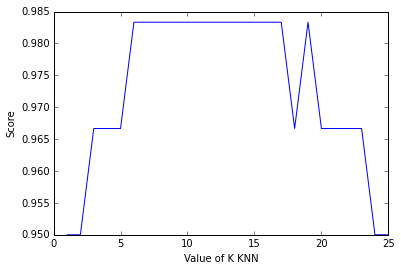

In [49]:
plt.plot(k_range,scores)
plt.xlabel("Value of K KNN")
plt.ylabel("Score")

In [50]:
#Train accuracy increases as model complexity increases
#Testing accuracy penalisses model that are not too complex or less compless
#Complexity for KNN is is the value of K , lower K = more complex

In [51]:
#Highest score between is when K is between 6 and 17 
#Select 11 as the value of K as it comes almost in the middle of 6 and 17

In [54]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X,y)
knn.predict([3, 5, 4, 2])

/home/bijith/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [55]:
#Provides a high-variance estimate of out-of-sample accuracy
#K-fold cross-validation overcomes this limitation
#But, train/test split is still useful because of its flexibility and speed